# **Aprendizaje supervisado**
# SL05. Regresion Logística

El algoritmo de **regresión logística** es uno de los más utilizados en aprendizaje automático. Siendo su principal aplicación los problemas de clasificación binaria. Es un algoritmo simple en el que se pueden interpretar fácilmente los resultados obtenidos e identificar por qué se obtiene un resultado u otro. A pesar de su simplicidad funciona muy bien en muchas aplicaciones y se utiliza como referencia de rendimiento.

La regresión logística es una técnica de aprendizaje automático que proviene del campo de la estadística. A pesar de su nombre no es un algoritmo para aplicar en problemas de regresión, en los que se busca un valor continuo, sino que es un método para problemas de clasificación, en los que se obtienen un valor binario entre 0 y 1. Por ejemplo, un problema de clasificación es identificar si una operación dada es fraudulenta o no. Asociándole una etiqueta “fraude” a unos registros y “no fraude” a otros. Simplificando mucho es identificar si al realizar una afirmación sobre registro esta es cierta o no.

Con la regresión logística se mide la relación entre la variable dependiente, la afirmación que se desea predecir, con una o más variables independientes, el conjunto de características disponibles para el modelo. Para ello utiliza una función logística que determina la probabilidad de la variable dependiente. Como se ha comentado anteriormente, lo que se busca en estos problemas es una clasificación, por lo que la probabilidad se ha de traducir en valores binarios. Para lo que se utiliza un valor umbral. Los valores de probabilidad por encima del valor umbral la afirmación es cierta y por debajo es falsa. Generalmente este valor es 0,5, aunque se puede aumentar o reducir para gestionar el número de falsos positivos o falsos negativos.

En términos generales la regresión logísticas usa un **enfoque probabilístico**.

$h_{\theta}(x)$ debería ser $p(y=1/x;\theta)$.

Modelo de regresión logística:

Vemos en la primera ecuación una regresión lineal multi
$$h_{\theta}(x)=g(\theta^{T}x)$$
La función sigmoidea
$$g(z) = \frac{1}{1+e^{-z}}$$
La combinación de ambas
$$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$$

<img src='https://drive.google.com/uc?export=view&id=1MeNaOMGnQE1uBOLfJAR4b53d0v630mHR' width="400" align="center" style="margin-right: 20px">

$\theta^{T}x$ debería tener valores **negativos** grandes para instancias negativas y valores **positivos** grandes para instancias positivas.

Definir un umbral:

* Predecir $y=1$ si $h_{\theta}(x) 	\geq0.5$
* Predecir $y=0$ si $h_{\theta}(x) 	< 0.5$

<img src='https://drive.google.com/uc?export=view&id=1esyo1Y8jCivlo7Xwyeyd0CWiVnWO6Ftk' width="400" align="center" style="margin-right: 20px">

Para entender el funcionamiento de la regresión logística utilizaremos un ejemplo.

### Cargar el dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Data set cargado.

iris = load_iris()
x = iris.data
y = iris.target
# Transformelo a data frame para visualizarlo
df = pd.DataFrame(x,columns = iris.feature_names)
df['species_id'] = y
species_map = {0:'setosa',1:'versicolor',2:'virginica'}
df['species_name'] = df['species_id'].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## <font color='green'>Actividad 1</font>

Realice un analisis exploratorio del dataset Iris con el objetivo de indentificar la factibilidad de construir un clsificador de especies. ¿Qué especie se ve fácilmente separable?

In [ ]:
# Tu código aquí
# Obtener estadísticas descriptivas del conjunto de datos
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  species_id  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


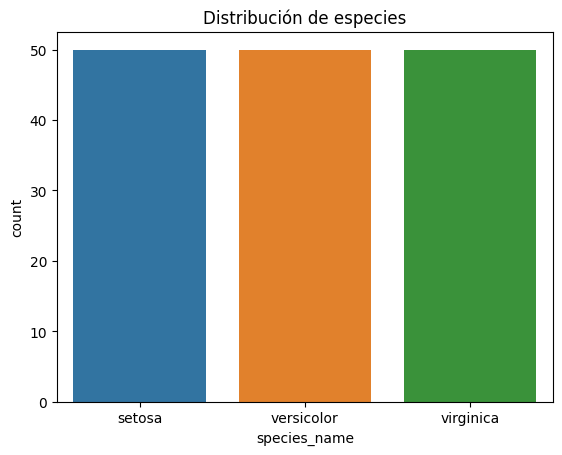

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución de las especies
sns.countplot(x='species_name', data=df)
plt.title('Distribución de especies')
plt.show()


<ipython-input-5-56228404c190>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


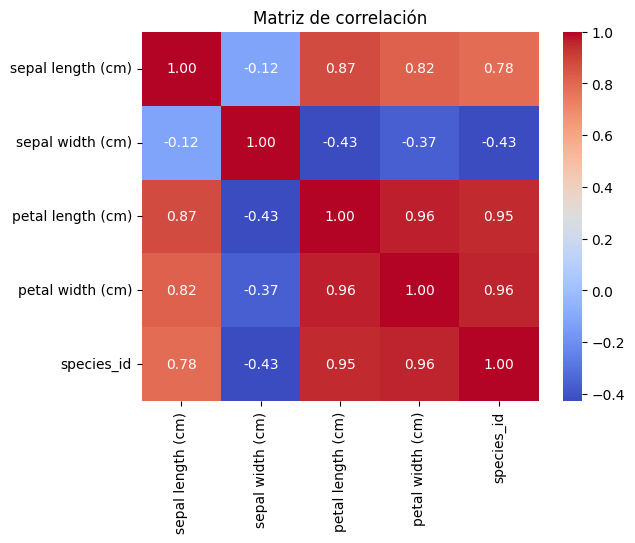

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


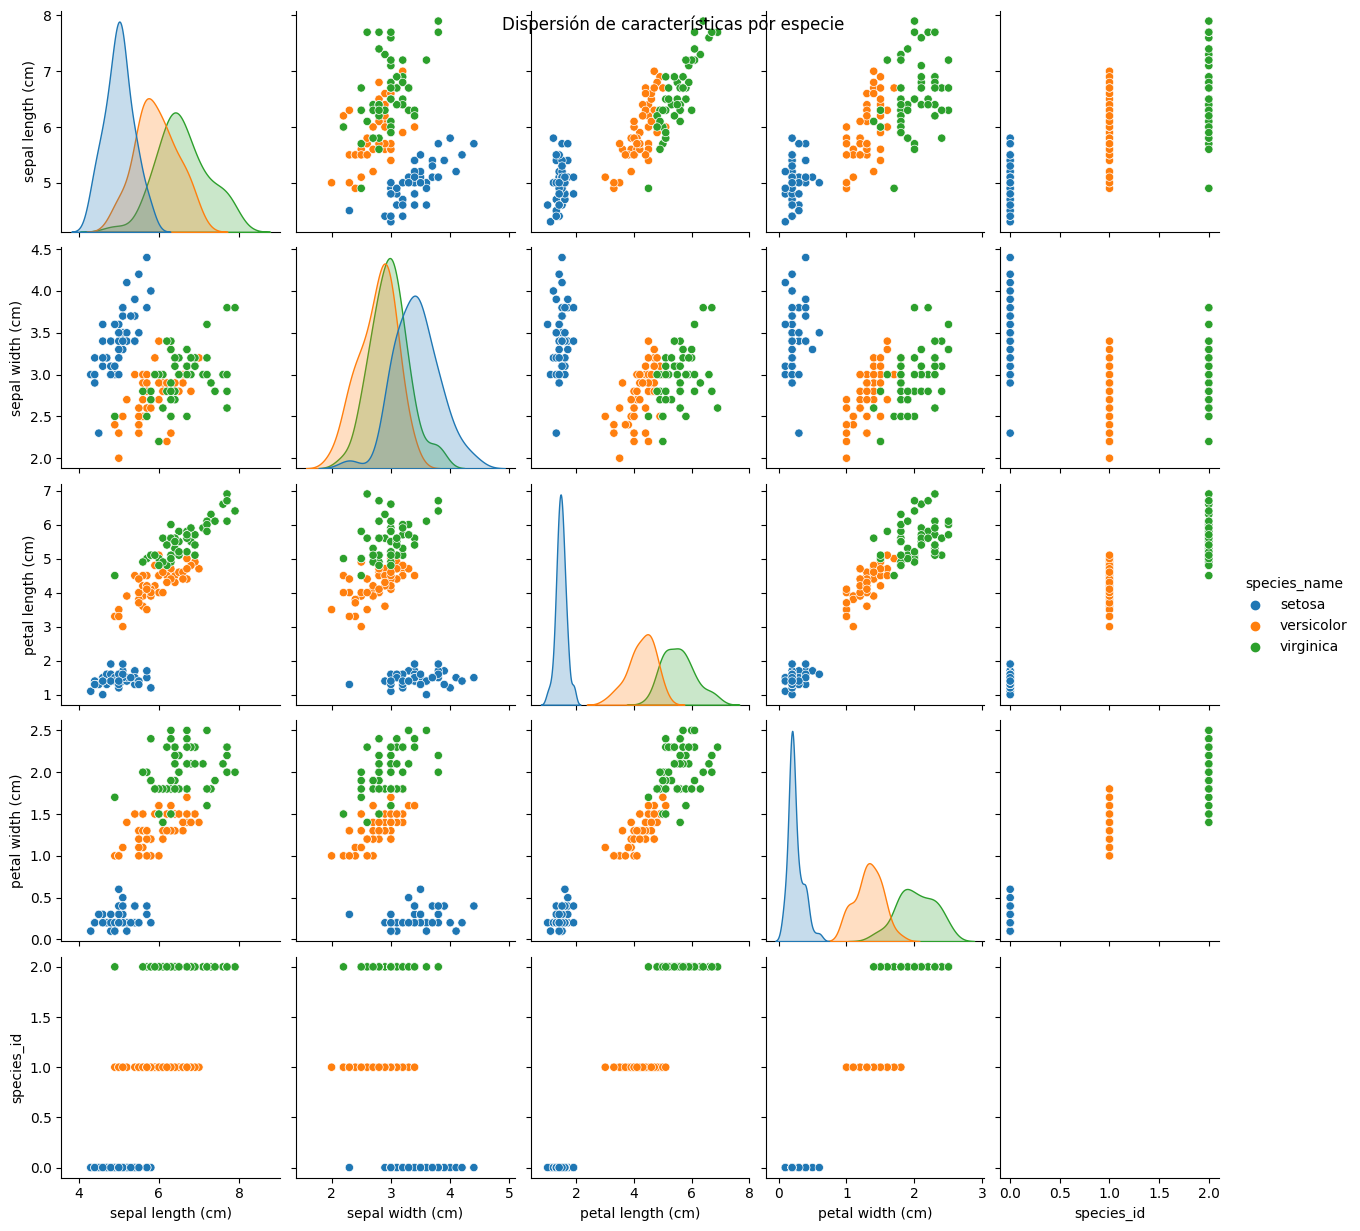

In [ ]:
# Gráfico de dispersión de características por especie
sns.pairplot(df, hue='species_name')
plt.suptitle('Dispersión de características por especie')
plt.show()


<font color='green'>Fin Actividad 1</font>

### Adaptando el data set a un problema binario.

Como se vió en las visualizaciones anteriores. Vamos a reconocer setosa de las otras especies. Para esto debemos adaptar nuestra variable de salida.

```
y1 = np.where(y==2, 1, y)
print(y1)
```



In [ ]:
y1 = np.where(y==2, 1, y)
print(y1)

### Separar conjunto de entrenamiento y validación

Utilice el mismo método que en regresión lineal para realizar split y LogisticRegression para la regresión logistica.





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.33, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

### Verificación

```
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,len(y_test)):
  print (y_test[i],probabilidades[i])

```



In [ ]:
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,10):
  print (y_test[i],probabilidades[i])

## <font color='blue'>**¿Cómo funciona la regresión logística?**</font>

Dado un conjunto de entradas X, queremos asignarlas a una de dos categorías posibles (0 o 1). La regresión logística modela la probabilidad de que cada entrada pertenezca a una categoría particular.

### Contruya una función sigmoidea


In [ ]:
# Función sigmoidea.

def sigmoidea(z):
    return 1 / (1 + np.exp(-z))

### ¿Como medimos que tan buenos esta siendo nuestro modelo?
### La función de perdida. Entropía cruzada

La entropía de una variable aleatoria X, es el nivel de incertidumbre inherente a las posibles variables de resultado.

Sea $p(x)$ una distribución de probabilidad de una variable aleatoria $X$. Entonces la **entropía** se define por:

$$ H(X) =- \sum_x p(x) log(p(x))$$ para el caso discreto.


![Log](https://drive.google.com/uc?export=view&id=1RW2paVAoK7kmrGl8C-Y5Zim6YpeLtVsF)


Veamos un ejemplo concreto:

![Entropia](https://drive.google.com/uc?export=view&id=13pUhML_hNg6sdHG9h5lToPu1Mxx9uPuB)


Calcule la entropía para cada uno de los contenedores.

1. $ -[\frac{26}{30}log_2(\frac{26}{30}) + \frac{4}{30}log_2(\frac{4}{30}) ]$ = 0.5665

2. =  0.9968

3. =  0

Nuestra entropía esta midiendo un desorden (Termodinamica, Mecánica estadística, o la cantidad de ruido que contiene una señal (Teoria de la información).

Entropia Cruzada:

También se llama pérdida logarítmica o pérdida logística. Cada probabilidad de clase predicha se compara con la salida deseada de clase real 0 o 1 y se calcula una puntuación/pérdida que penaliza la probabilidad en función de qué tan lejos está del valor esperado real. La penalización es de naturaleza logarítmica, lo que genera una puntuación grande para las diferencias grandes cercanas a 1 y una puntuación pequeña para las diferencias pequeñas que tienden a 0.

![EntropiaCruzada](https://drive.google.com/uc?export=view&id=1VlvM3dWPbapiJFUs_cVe2gkAlRHCrEGz)


$$L{CE} = - \sum_{i=1}^n t_ilog(p_i)$$, para $n$ clases.

Donde $t_i$ es el truth label y $p_i$ la probabilidad obtenida de la función softmax para la $i^{th}$ clase.

$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

En el caso del ejemplo tenemos:

$L_{CE} = -1log_2(0.936)+0+0+0$ = 0.095

```
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
```



In [ ]:
# Función de loss

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

### El gradiente

1. **¿Que es el gradiente?:** El gradiente es un vector que es tangente de una función y apunta en la dirección de mayor aumento de esta función. El gradiente es cero en un máximo o mínimo local porque no hay una única dirección de aumento. En matemáticas, el gradiente se define como una derivada parcial para cada variable de entrada de la función.

$$ \nabla f(x,y) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$$

2. **¿Que es el gradiente descendente?:**  Como el gradiente es un vector que apunta al mayor aumento de una función, el gradiente negativo es un vector que apunta al mayor descenso de una función. Por lo tanto, podemos minimizar una función moviéndonos iterativamente **un poco** en la dirección del gradiente negativo. Esa es la lógica del descenso en gradiente.

Dado un punto de partida $(X_1^{0}, ...,X_n^{0})$
$$ x_1^{(i+1)} = x_1^{(i)} - \alpha \frac{\partial f}{\partial x_1}(x^{(i)})$$

$$ x_n^{(i+1)} = x_n^{(i)} - \alpha \frac{\partial f}{\partial x_n}(x^{(i)})$$


![GradientDescent](https://drive.google.com/uc?export=view&id=15VIlre07RyAx_VsUFVtS7Hyt1Nk5w3WN)

Un parámetro importante en el descenso de gradientes es la tasa de aprendizaje (LearningRate, $\alpha$), que determina el tamaño de cada paso. Cuando la tasa de aprendizaje es demasiado grande, el descenso en pendiente puede saltar a través del valle y terminar en el otro lado. Esto conducirá a la divergencia de la función de costos. Por otro lado, cuando la tasa de aprendizaje es demasiado pequeña, el algoritmo tardará mucho en converger. Por lo tanto, se necesita una velocidad de aprendizaje adecuada antes de que comience el descenso de gradiente.


![Learningrate](https://drive.google.com/uc?export=view&id=1-EPuN5D59Phhhk-FKCfzz3yqk2mbsC39)  


La normalización juega un papel importante en Gradient Descent. Si las características no están normalizadas, las características a gran escala dominarán la actualización, por lo que el algoritmo generará una ruta de aprendizaje en zigzag. Se necesitan muchos pasos innecesarios y más tiempo para llegar al mínimo. Una vez normalizadas todas las características, la función de coste adquiere una forma más esférica. El algoritmo Gradient Descent va directo al mínimo. Una forma de realizar la normalización es menos la media y dividir por la desviación estándar. También puede aplicar la función Scaler de Scikit-Learn directamente.







## Las ecuaciones:

$$h_{\theta}(x) = \sigma(\theta^Tx)$$
Donde $$\sigma = \frac{1}{1+ e^z}$$
Además sea $$z(\theta) = \theta^Tx $$
Se define la función de pérdida (__Loss Function__) de entropía cruzada como:
<br><br>
$$
\begin{split}
L(y,\hat{y}) &= -[y \log (\hat{y}) + (1-y) \log{(1-\hat{y})}]
\\
L(y,\hat{y}) &= -[y \log (\sigma(z(\theta))) + (1-y) \log{(1-\sigma(z(\theta)))}]
\\
\frac{\partial L(y,\hat{y})}{\partial \theta_j} &= -\big[\frac{\partial  y\log (\sigma(z(\theta))) }{\partial \theta_j} +  \frac{\partial (1-y) \log{(1-\sigma(z(\theta)))}}{\partial \theta_j}\big]
\\
\frac{\partial L(y,\hat{y})}{\partial \theta_j} &= -\big[\frac{y}{\sigma(z(\theta))}\frac{\partial \sigma(z(\theta))}{\partial \theta_j} + \frac{1-y}{1-\sigma(z(\theta_j))}\frac{\partial \sigma(1 - z(\theta))}{\partial \theta_j}\big]
\\
\frac{\partial L(y,\hat{y})}{\partial \theta_j} &= \big[\frac{1-y}{1-\sigma(z(\theta))} -\frac{y}{\sigma(z(\theta))}\big] \frac{\partial \sigma(z(\theta))}{\partial \theta_j}
\end{split}
$$
<br><br>
Apliquemos la derivada sobre la sigmoidea $\sigma(z)'= \sigma(z)(1-\sigma(z))$
<br><br>
$$
\begin{split}
\frac{\partial L(y,\hat{y})}{\partial \theta_j} &= \big[\frac{\sigma(z(\theta)) - y}{\sigma(z(\theta)) [1 - \sigma(z(\theta))]} \big] \; \sigma(z(\theta)) (1-\sigma(z(\theta)))x_j
\\
\frac{\partial L(y,\hat{y})}{\partial \theta_j} &= [\sigma(z(\theta)) - y] x_j
\end{split}
$$








```

gradiente = np.dot(X.T, (h - y)) / y.shape[0]
lr = 0.01
theta -= lr * gradient
```

```
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))
```

```
def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
```





## <font color='green'>Actividad 2</font>

Construya la regresión logistica.

Defina una funcion fit(X,y):

1. Al dataset $X$, se le agrega un intercepto, utilizando la función *add_intercept*.
2. Definimos un array theta que contenfa los pesos de la regresión logistica, los puede iniciar en 0 o aleatorios.
3. Itere los siguientes pasos una cantidad determinada de veces, por ejemplo 20.000

    a.  Haga un forward (multiplique el vector de entrada con theta, utilice la función dot)

    b. Aplique la función gradiente.

    c. Aplique el learning rate y actualice theta.
4. Prediga el conjunto de test con la función predict_probs
5. Compare theta y los resultados con la función utilizada en sklearn.

In [ ]:
# Tu código aquí



<font color='green'>Fin Actividad 2</font>